# Laboratorio 1

In [339]:
# Importando librerias necesarias
import cv2 as cv
import numpy as np
import skimage as sk

from matplotlib import pyplot as plt
from skimage.filters import thresholding as th
from skimage import morphology as mp

## Ejercicio 6

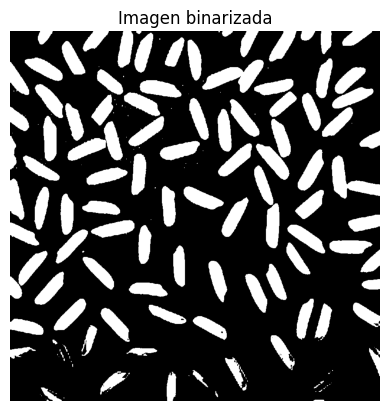

In [340]:
# Paso 1. Binarización de imagen
image_path = 'images/rice.jpg'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Mostrando imagen binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()


In [341]:
from utils import two_pass_labeling

labeled_image = two_pass_labeling(binary_image)
n_labels = len(np.unique(labeled_image)) - 1
print(f'Cantidad de arroces encontrados [manual]: {n_labels}')

Cantidad de arroces encontrados [manual]: 199


In [342]:
contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f'Cantidad de arroces encontrados [OpenCV]: {len(contours)}')

Cantidad de arroces encontrados [OpenCV]: 193


## Ejercicio 7

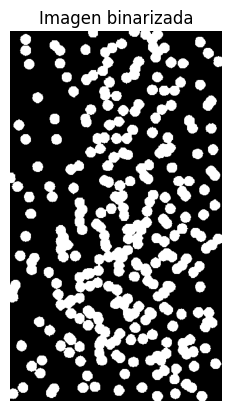

In [343]:
# Paso 1. Binarización de imagen
image_path = 'images/microscope.png'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Mostrando imagen binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()


La componente conexa de menor tamaño es la etiqueta 2 con 158 unidades.


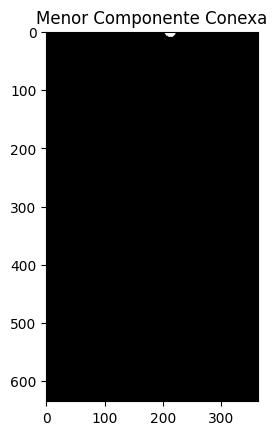

In [344]:
from utils import get_component_size

labeled_image = two_pass_labeling(binary_image)
info, image = get_component_size(labeled_image, 'small')
print(info)

plt.imshow(image, cmap='gray')
plt.title(f'Menor Componente Conexa')
plt.show()

Número de píxeles en la componente conexa de menor tamaño es: 134.5


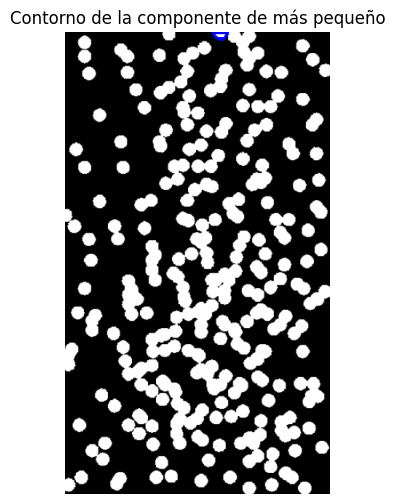

In [345]:
# Con numpy

contours, _ = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_size = 999999999999
[min_contour := [c] for c in contours if (size := cv.contourArea(c)) < min_size and (min_size := size)]

print(f'Número de píxeles en la componente conexa de menor tamaño es: {min_size}')

highlight_image = np.copy(imagen_color)
cv.drawContours(highlight_image, min_contour, 0, (0, 0, 255), 3)

plt.figure(figsize=(12, 6))
plt.title('Contorno de la componente de más pequeño')
plt.imshow(highlight_image)
plt.axis('off')
plt.show()


La componente conexa de mayor tamaño es la etiqueta 600 con 4179 unidades.


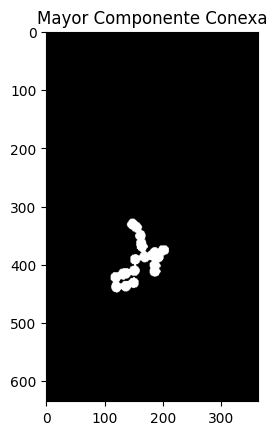

In [346]:
labeled_image = two_pass_labeling(binary_image)
info, image = get_component_size(labeled_image, 'large')
print(info)

plt.imshow(image, cmap='gray')
plt.title('Mayor Componente Conexa')
plt.show()


In [347]:
print('Número de componentes conexas [manual]:', len(np.unique(labeled_image)) - 1)
print('Número de componentes conexas [OpenCV]:', len(contours))

Número de componentes conexas [manual]: 125
Número de componentes conexas [OpenCV]: 125


## Ejercicio 8

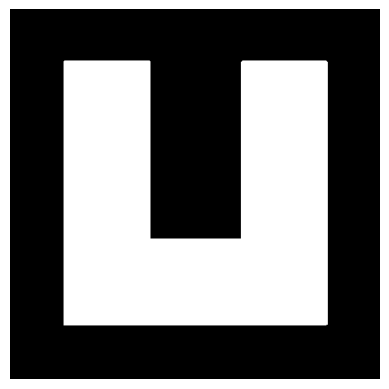

In [348]:
image_path = 'images/ej8.png'
imagen_color = cv.imread(image_path)
imagen_gris = cv.cvtColor(imagen_color, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(imagen_gris, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

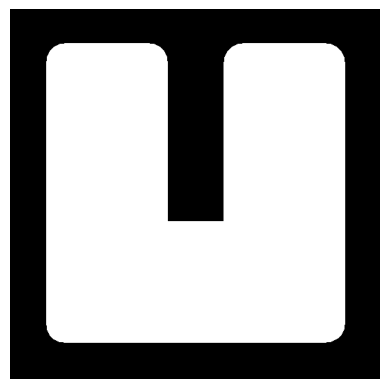

In [349]:
r = 25
di = mp.disk(r)
disk_dilation = mp.dilation(binary_image, di)

plt.imshow(disk_dilation, cmap='gray')
plt.axis('off')
plt.show()
